<h2> Creating Model for Classification(bank data) </h2>

<h3> Import all the required libraries </h3>

In [2]:
#importing the required lib's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

# EDA

In [3]:
#reading or extracting bank data using pandas 
df=pd.read_csv('bank-full (1).csv',sep=';')#u can use seperator or delimetter to seprate the all columns which are merged as one
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
#size of the overall dataset
df.shape

(45211, 17)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

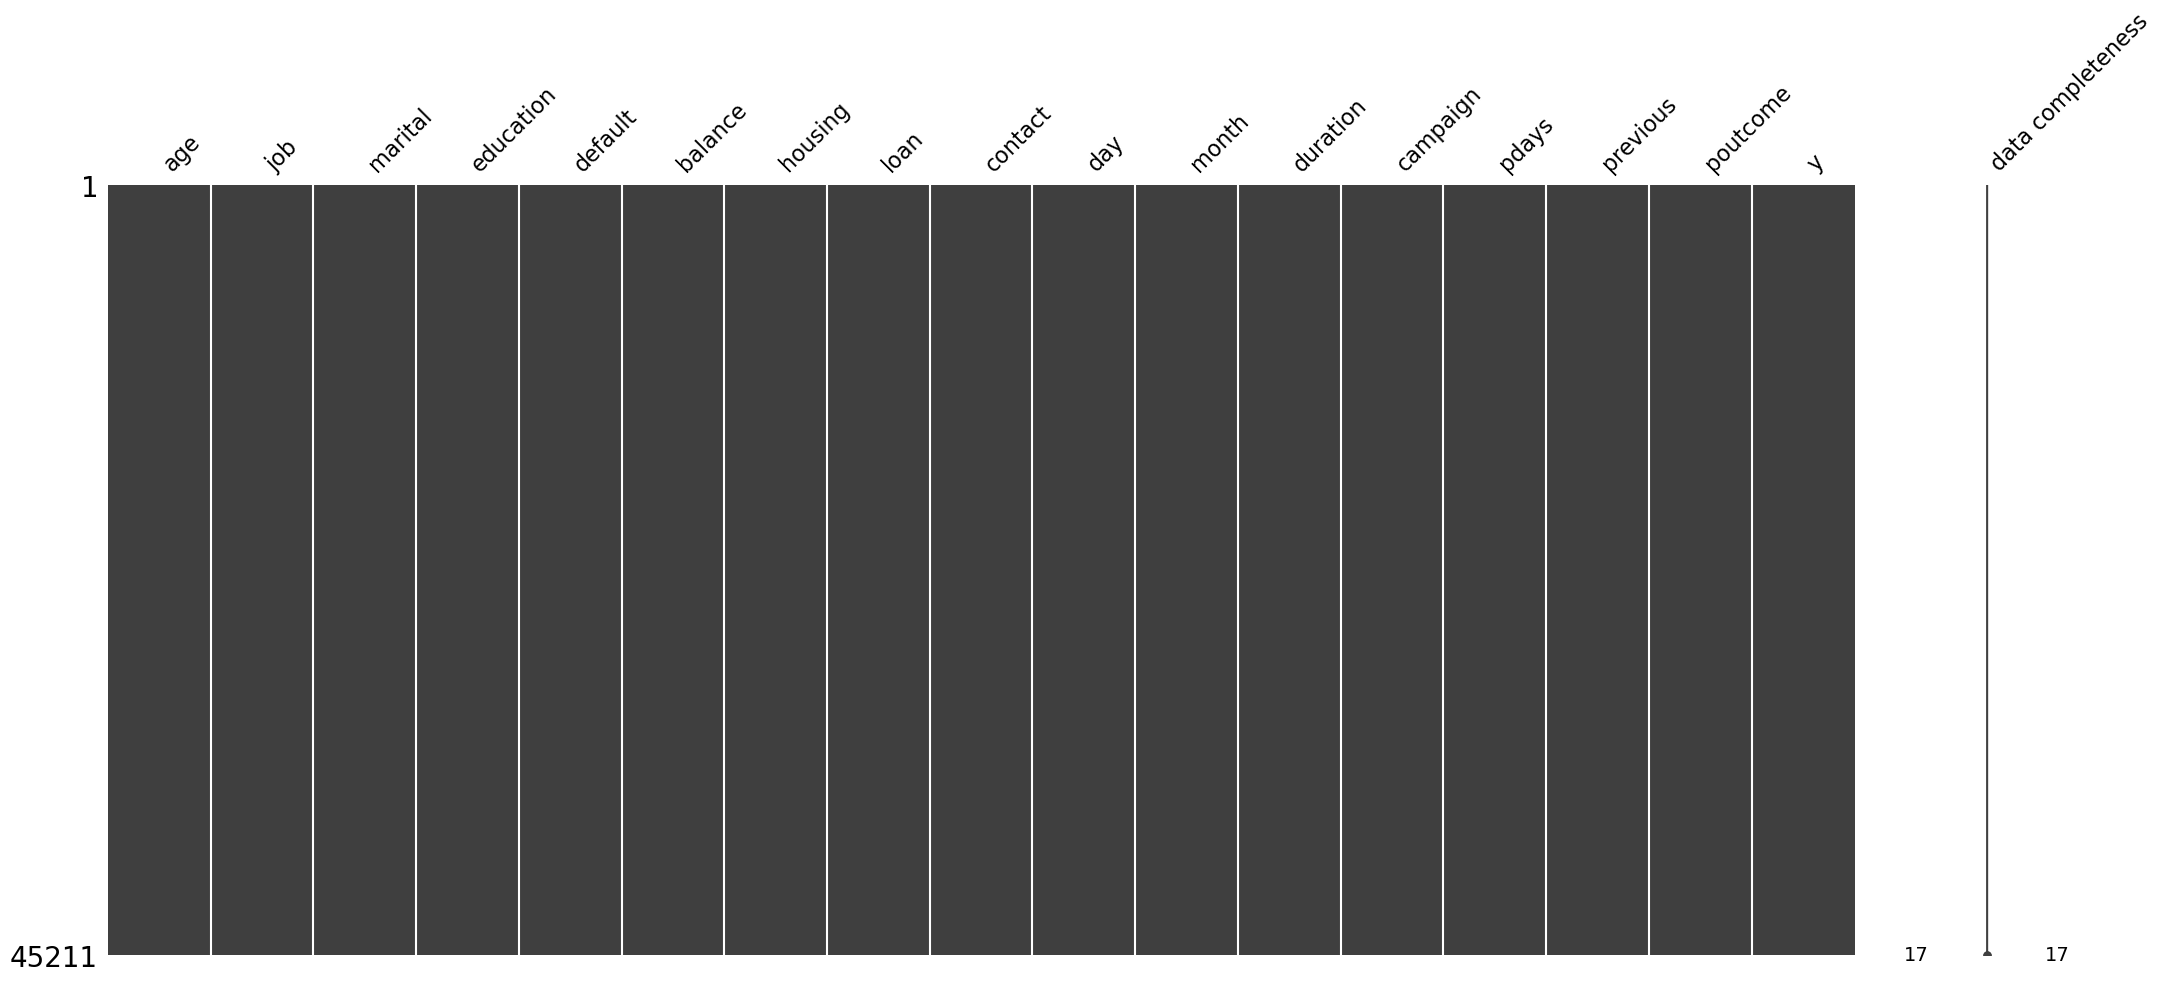

In [5]:
#finding null values
import missingno as msno

msno.matrix(df, labels=True, sort="descending");
df.isnull().sum()

In [6]:
#different datatypes in dataframe
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
df['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [8]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [9]:
df['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [10]:
df['default'].unique()

array(['no', 'yes'], dtype=object)

In [11]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [12]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [13]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [15]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [16]:
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [17]:
#Converting the catagorical data into numerical for classification purpose using Label Encoder,
#also converting object data type into int
df['default']=LabelEncoder().fit_transform(df['default'])
df['housing']=LabelEncoder().fit_transform(df['housing'])
df['loan']=LabelEncoder().fit_transform(df['loan'])
df['y']=LabelEncoder().fit_transform(df['y'])
df['job']=LabelEncoder().fit_transform(df['job'])
df['marital']=LabelEncoder().fit_transform(df['marital'])
df['education']=LabelEncoder().fit_transform(df['education'])
df['month']=LabelEncoder().fit_transform(df['month'])
df['contact']=LabelEncoder().fit_transform(df['contact'])
df['poutcome']=LabelEncoder().fit_transform(df['poutcome'])

df.head()#checking the datasets

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [18]:
#spliting the data based on independent and dependent variable for further processing
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

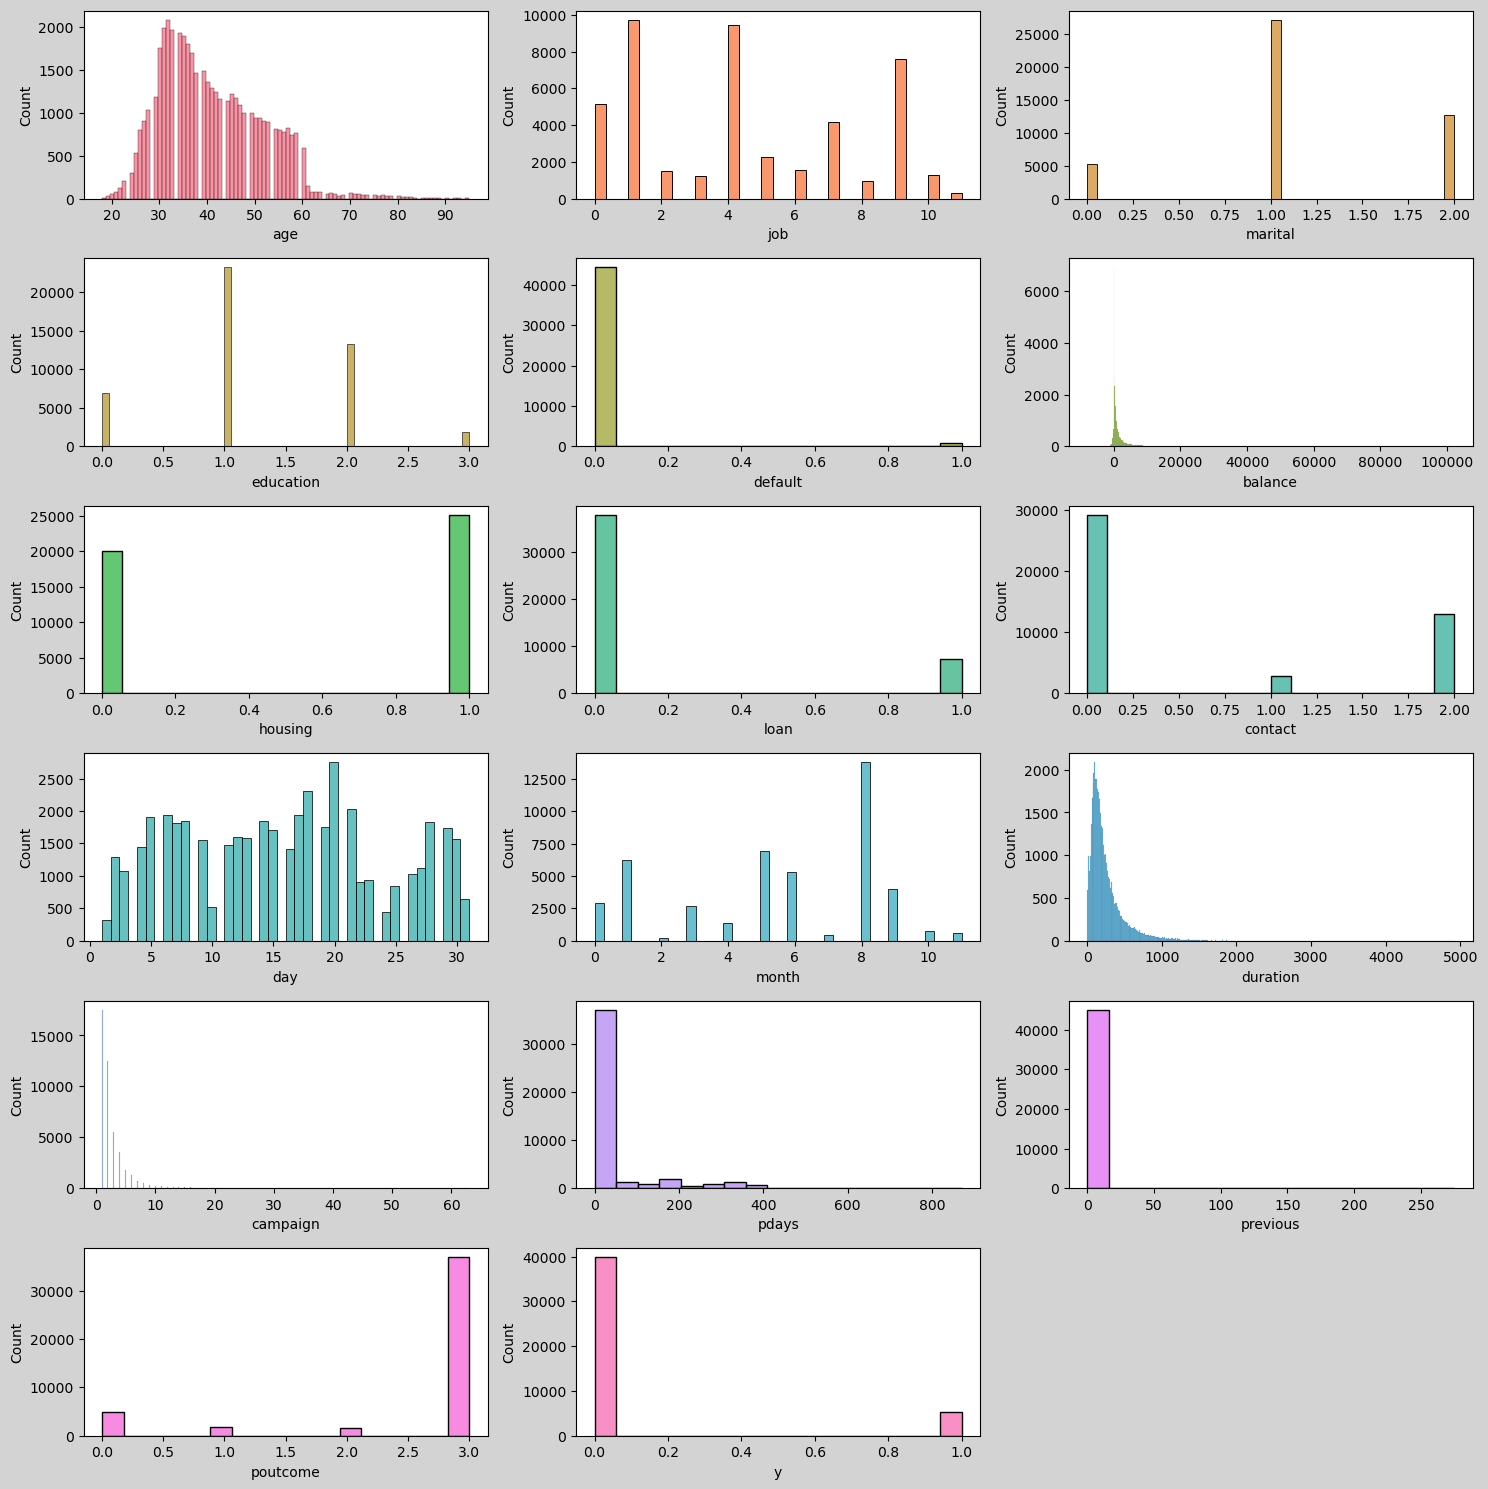

In [19]:
import matplotlib.pyplot as plt
c=3
r=6
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.histplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

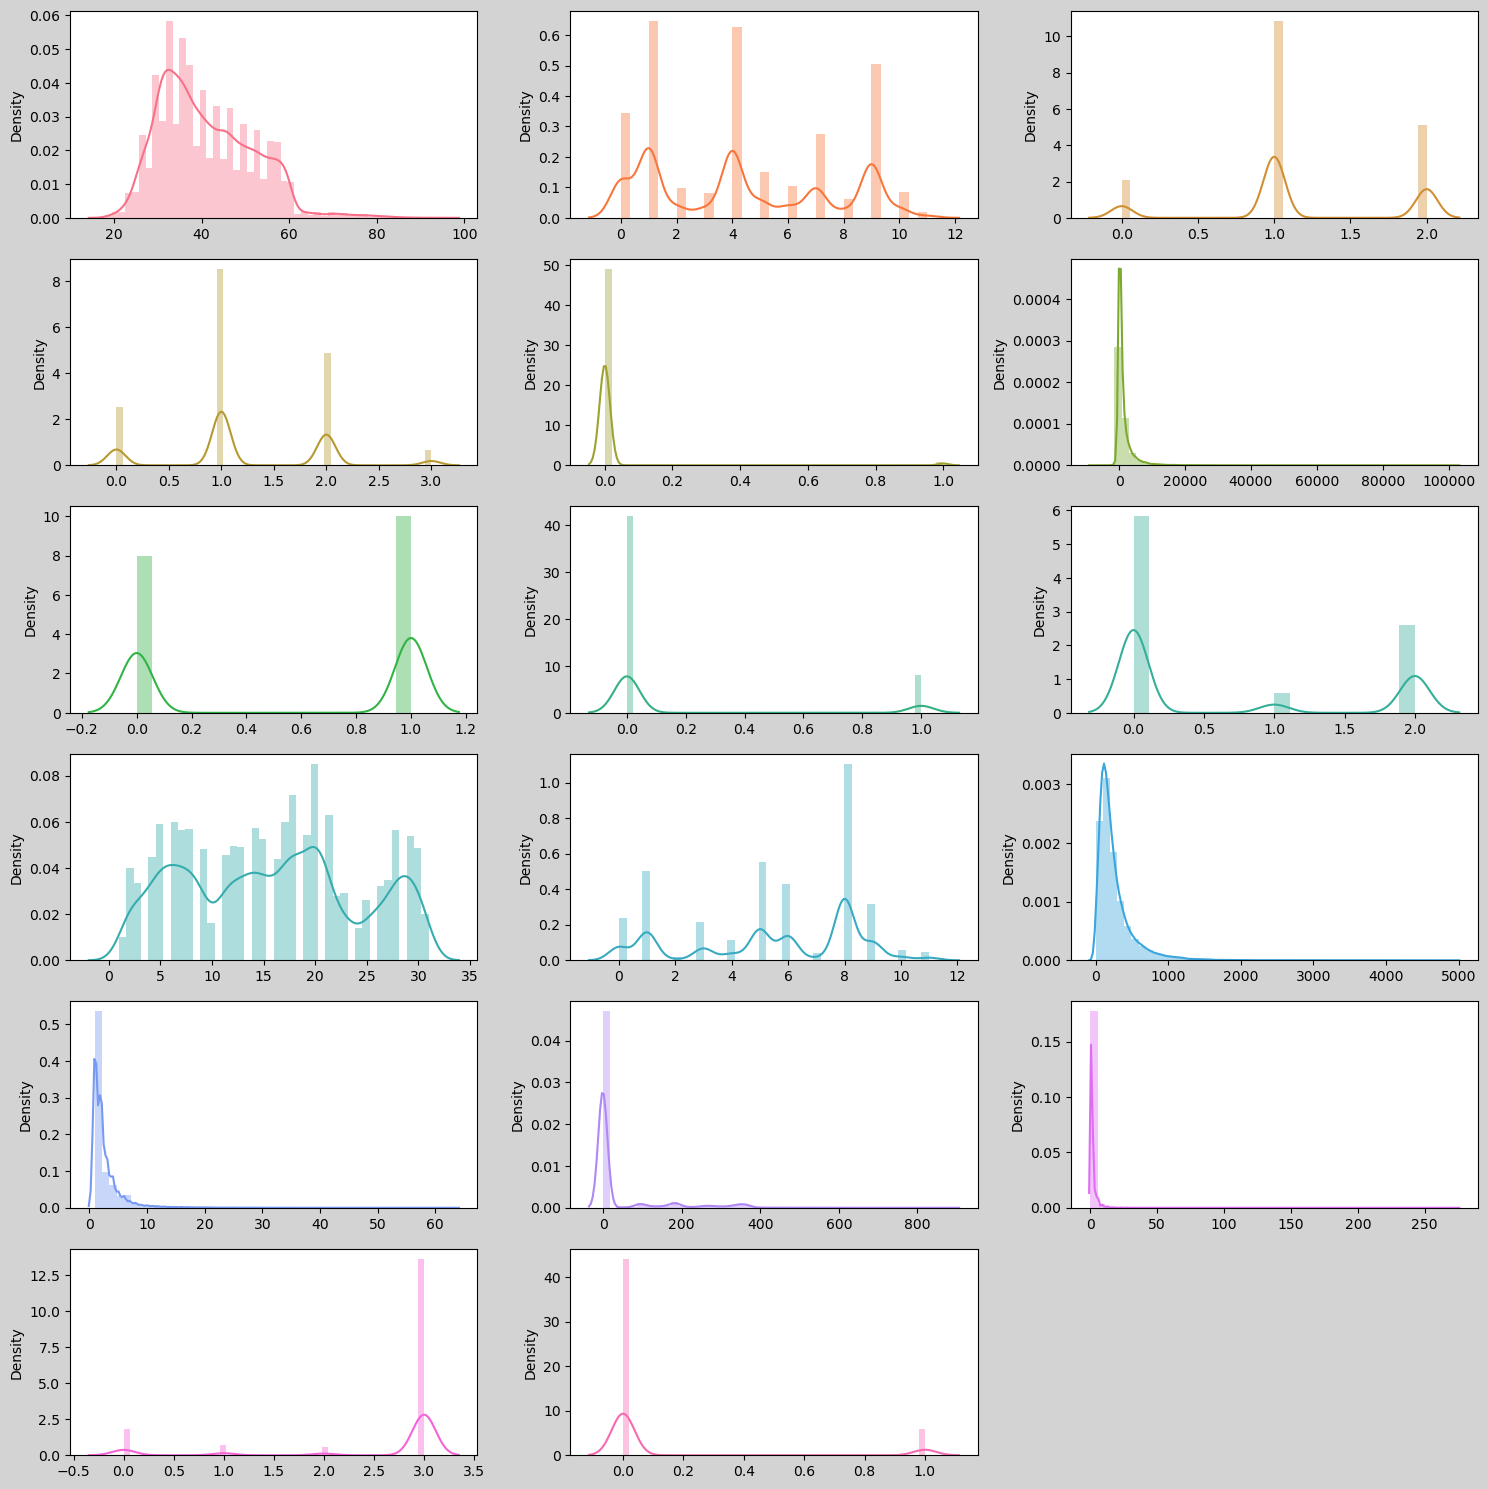

In [20]:
#performing univerent analysis
import matplotlib.pyplot as plt
c=3
r=6
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.distplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

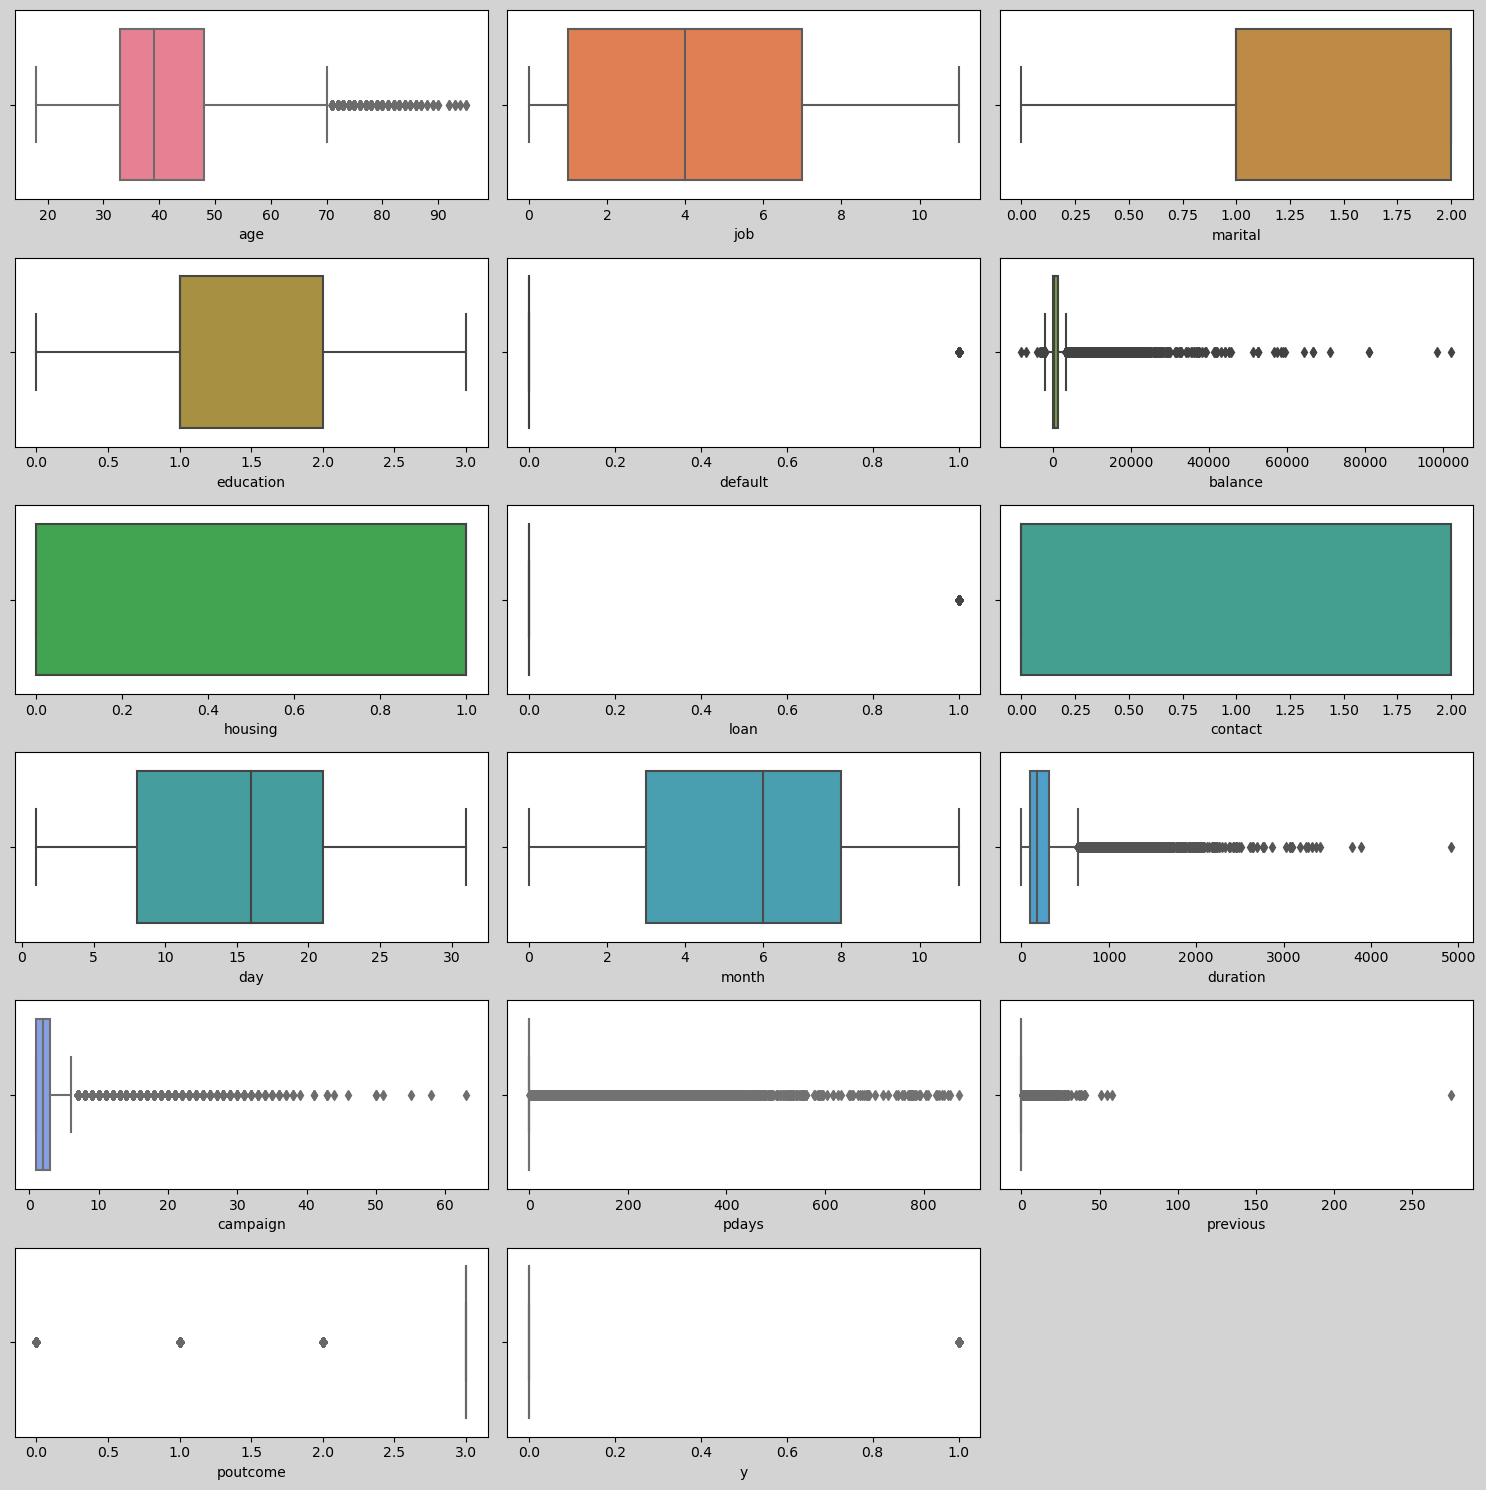

In [21]:
#performing univerent analysis
import matplotlib.pyplot as plt
c=3
r=6
col=df.select_dtypes(exclude='object').columns
size=plt.figure(figsize=(15,15),facecolor='lightgrey')

for i,co in enumerate(col):
    colors=sns.color_palette("husl",len(col))
    color=colors[i]
    axis=size.add_subplot(r,c,i+1)
    sns.boxplot(x=df[co],ax=axis,color=color)
size.tight_layout()
plt.show()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.021868,-0.403240,-0.106807,-0.017879,0.097783,-0.185513,-0.015655,0.026221,-0.009120,-0.042357,-0.004648,0.004760,-0.023758,0.001288,0.007367,0.025155
job,-0.021868,1.000000,0.062045,0.166707,-0.006853,0.018232,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.004744,0.006839,-0.024455,-0.000911,0.011010,0.040438
marital,-0.403240,0.062045,1.000000,0.108576,-0.007023,0.002122,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.011852,-0.008994,0.019172,0.014973,-0.016850,0.045588
education,-0.106807,0.166707,0.108576,1.000000,-0.010718,0.064514,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001935,0.006255,0.000052,0.017570,-0.019361,0.066241
default,-0.017879,-0.006853,-0.007023,-0.010718,1.000000,-0.066745,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.010021,0.016822,-0.029979,-0.018329,0.034898,-0.022419
balance,0.097783,0.018232,0.002122,0.064514,-0.066745,1.000000,-0.068768,-0.084350,-0.027273,0.004503,0.019777,0.021560,-0.014578,0.003435,0.016674,-0.020967,0.052838
housing,-0.185513,-0.125363,-0.016096,-0.090790,-0.006025,-0.068768,1.000000,0.041323,0.188123,-0.027982,0.271481,0.005075,-0.023599,0.124178,0.037076,-0.099971,-0.139173
loan,-0.015655,-0.033004,-0.046893,-0.048574,0.077234,-0.084350,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.012412,0.009980,-0.022754,-0.011043,0.015458,-0.068185
contact,0.026221,-0.082063,-0.039201,-0.110928,0.015404,-0.027273,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.020839,0.019614,-0.244816,-0.147811,0.272214,-0.148395
day,-0.009120,0.022856,-0.005261,0.022671,0.009424,0.004503,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.030206,0.162490,-0.093044,-0.051710,0.083460,-0.028348


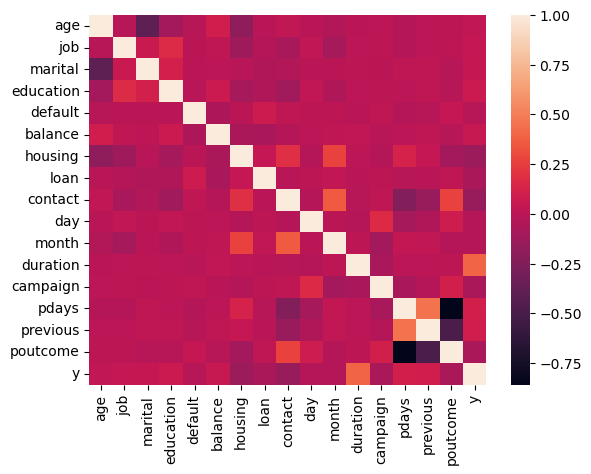

In [22]:
#checking the co relation of all the variables present in datasets
sns.heatmap(df.corr())#visualizing using heatmap feel great 

#checking the values of correlation
df.corr()

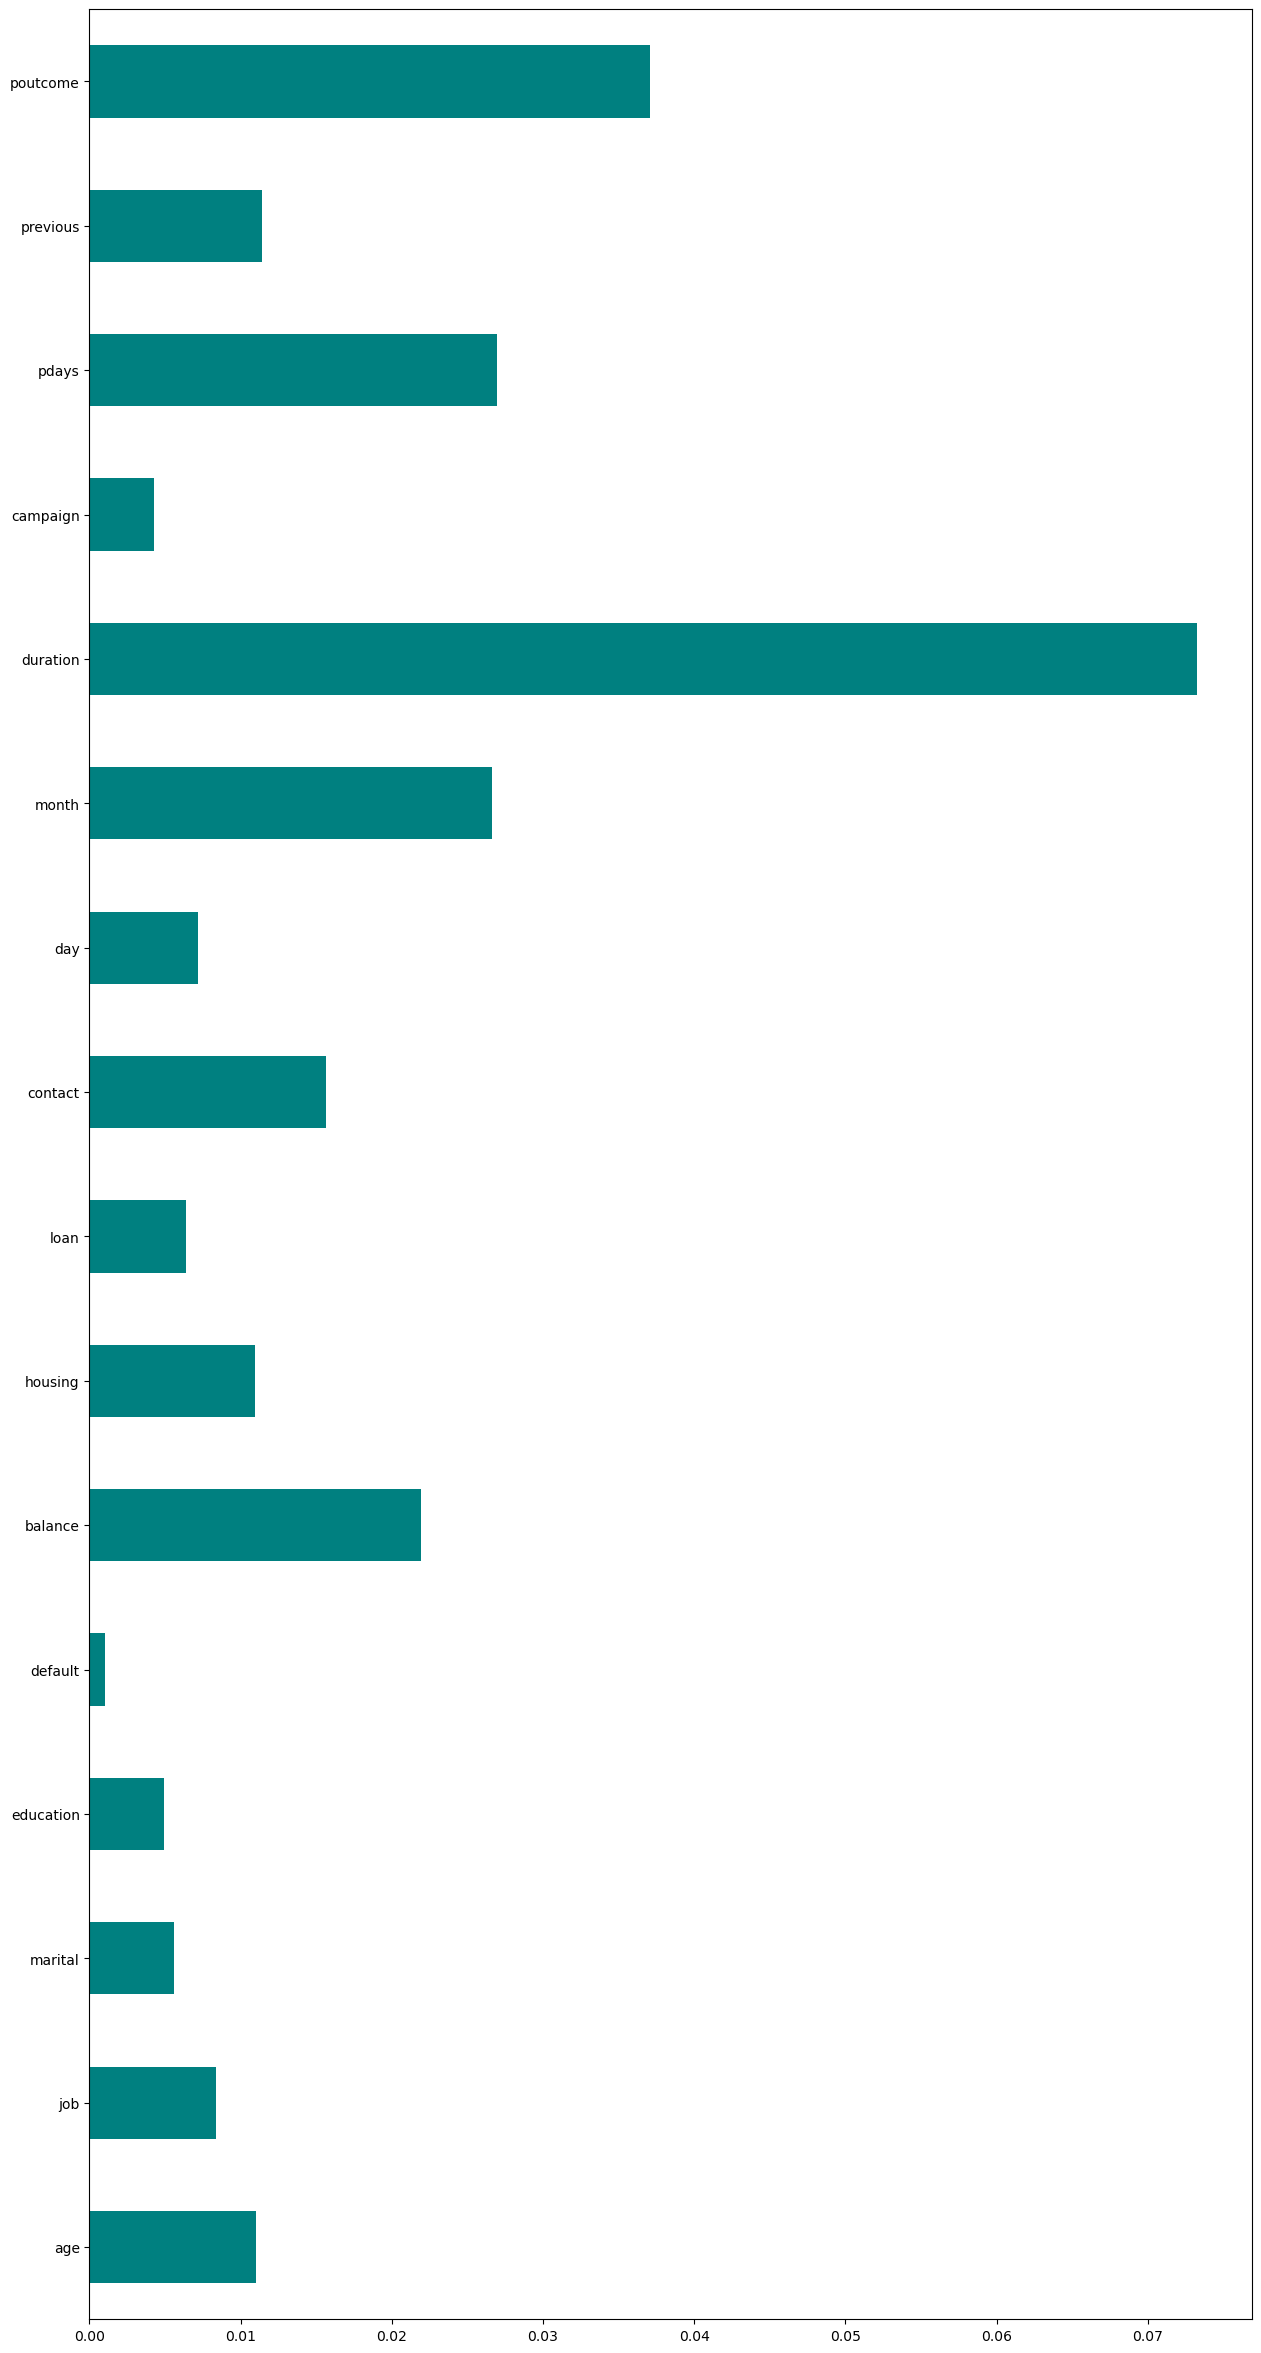

In [23]:
from sklearn.feature_selection import mutual_info_classif

plt.figure(figsize=(15,30))
importance=mutual_info_classif(x,y)
feat_imp=pd.Series(importance,df.columns[0:len(df.columns)-1])
feat_imp.plot(kind='barh',color='teal')
plt.show()

In [24]:
dict(feat_imp)

{'age': 0.011004802786109602,
 'job': 0.00838616813273596,
 'marital': 0.005617178018956004,
 'education': 0.004951186433854282,
 'default': 0.0010286883605354902,
 'balance': 0.02192054432892787,
 'housing': 0.010956482858477168,
 'loan': 0.006359866340232223,
 'contact': 0.015634064464236985,
 'day': 0.007156081126766134,
 'month': 0.02665421203356444,
 'duration': 0.07323100857974629,
 'campaign': 0.004283403437248978,
 'pdays': 0.026952920623244836,
 'previous': 0.011434473474131401,
 'poutcome': 0.03707907824718304}

In [25]:
df=df.drop('default',axis=1)

In [37]:
##Recursive Feature Elimination
x=df.drop('y',axis=1)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=400)
rfe = RFE(model)
fit = rfe.fit(x,y)
print(fit.ranking_)

[4 7 1 1 9 1 1 1 5 2 6 1 8 1 3]


In [38]:
c=pd.Series(fit.feature_names_in_)
ranking = pd.Series(fit.ranking_)
ranking
a=pd.Series(fit.ranking_)
b=pd.Series(df.drop('y',axis=1).columns)
d=pd.concat([a, b], axis=1).rename({1:'Ranking'}, axis = 1)
d

,0,Ranking
0,4,age
1,7,job
2,1,marital
3,1,education
4,9,balance
5,1,housing
6,1,loan
7,1,contact
8,5,day
9,2,month


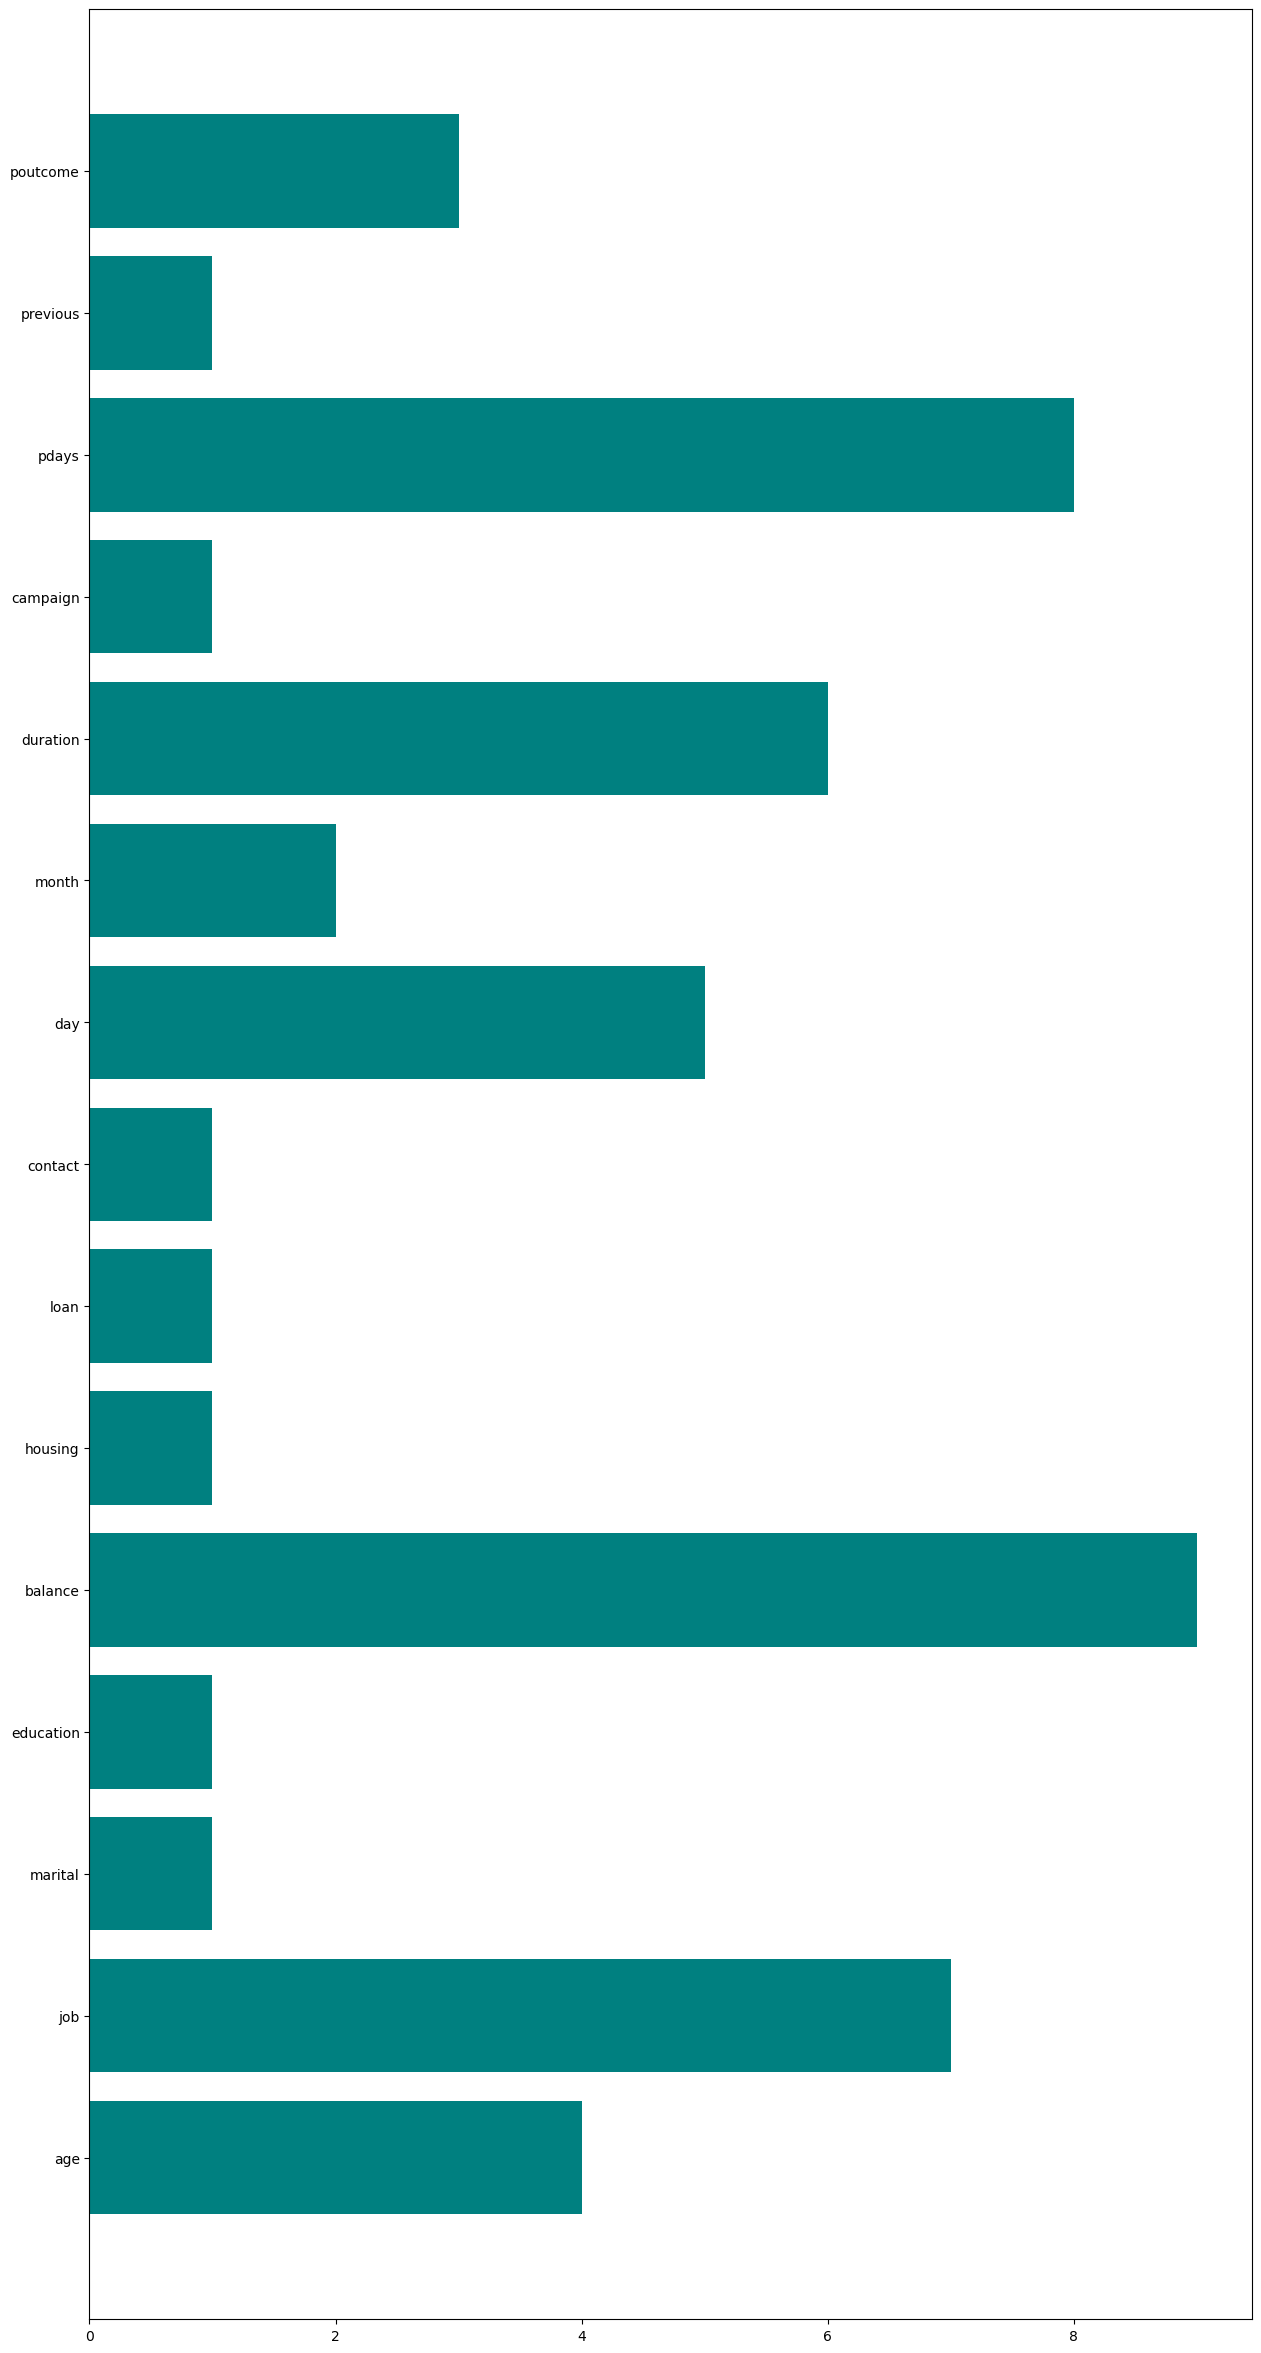

In [39]:
plt.figure(figsize=(15,30))
plt.barh(d['Ranking'],d[0],color='teal');
plt.show()

In [40]:
d['Ranking']

0           age
1           job
2       marital
3     education
4       balance
5       housing
6          loan
7       contact
8           day
9         month
10     duration
11     campaign
12        pdays
13     previous
14     poutcome
Name: Ranking, dtype: object

In [41]:
df.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

From boxplot I would conclude that all the feature contains so many outliers so to get better accuracy it should be treated

In [42]:
#ok lets treat the oulier i am using iqr method
def treatoutlier(df,cols):
    for col in cols:
        
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1
    
        upper=Q3+1.5*IQR
        lower=Q1-1.5*IQR
    
        df[col]=np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    

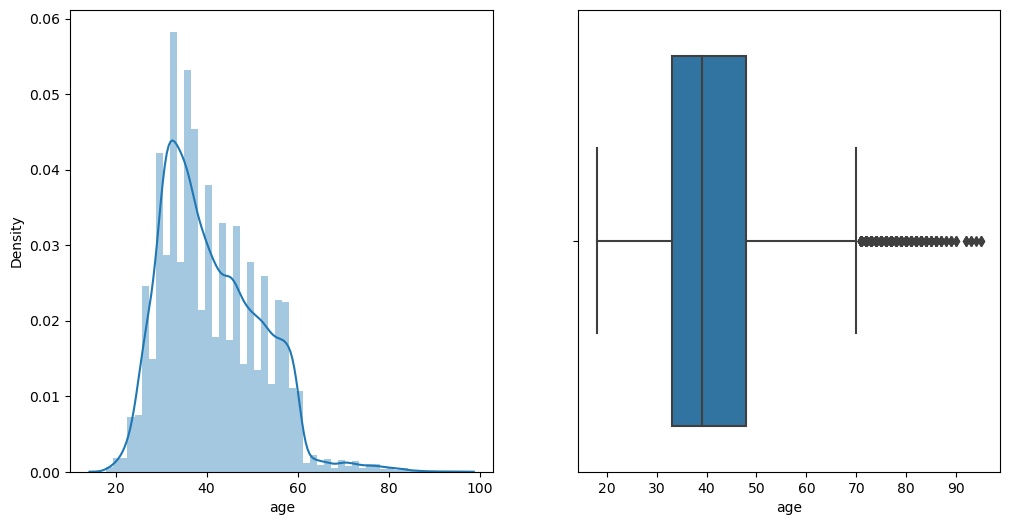

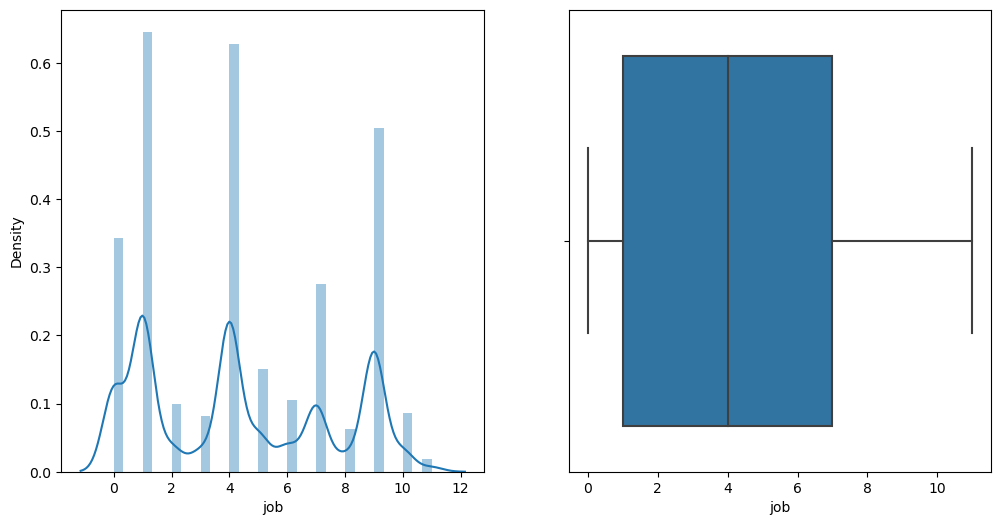

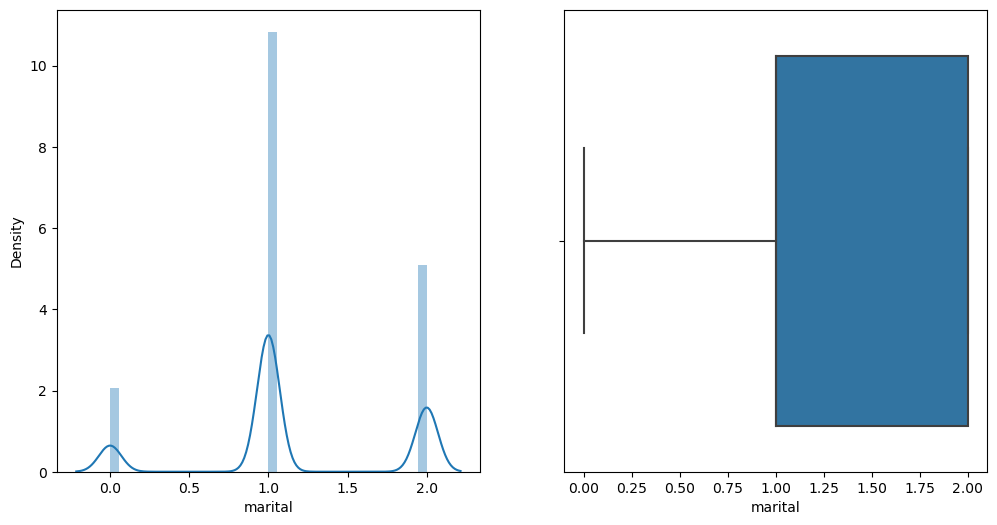

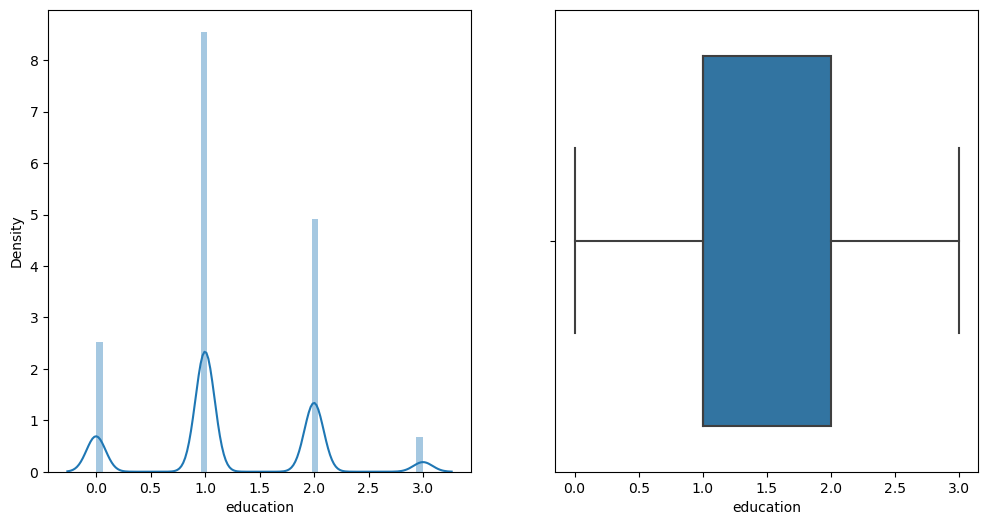

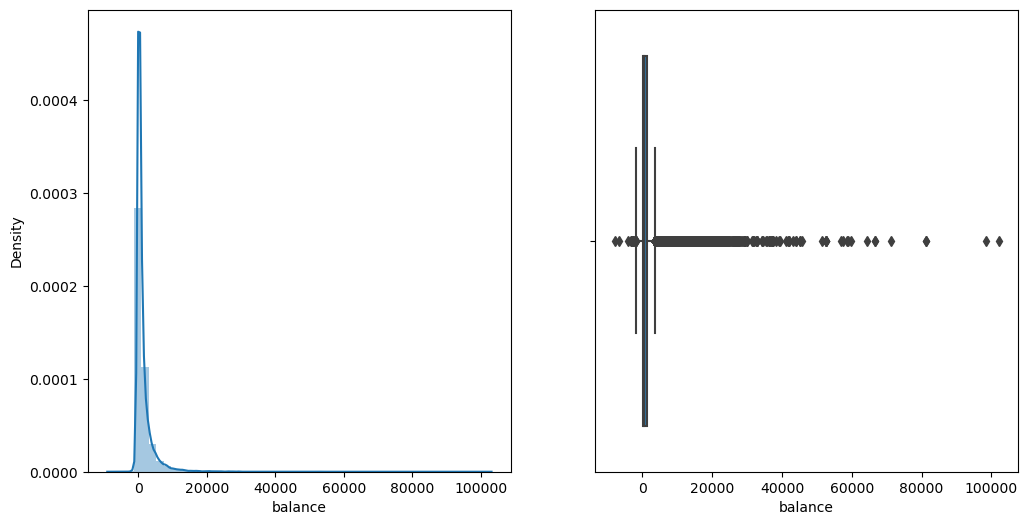

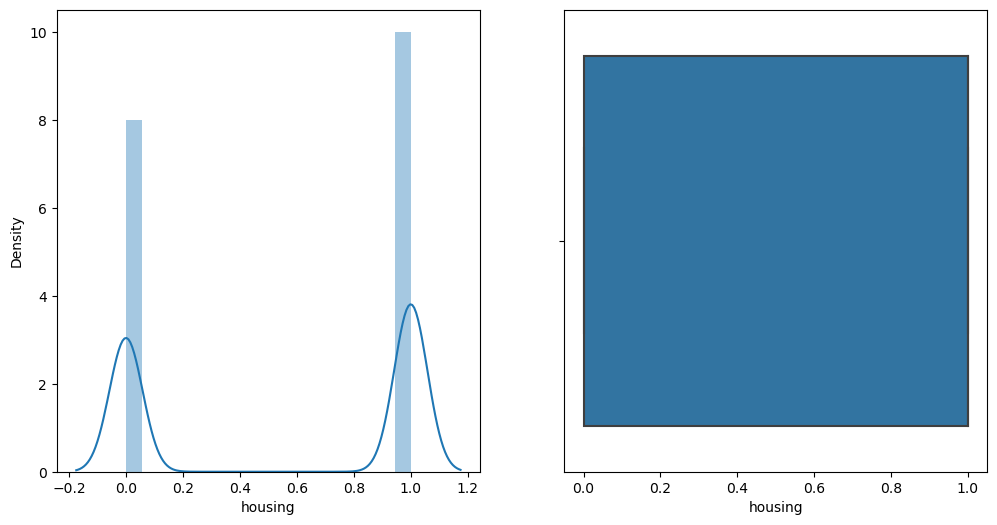

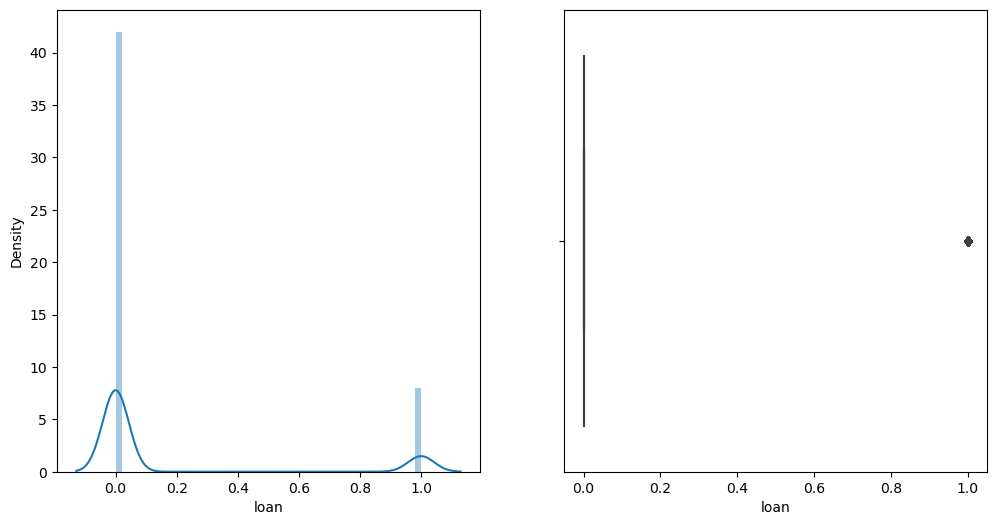

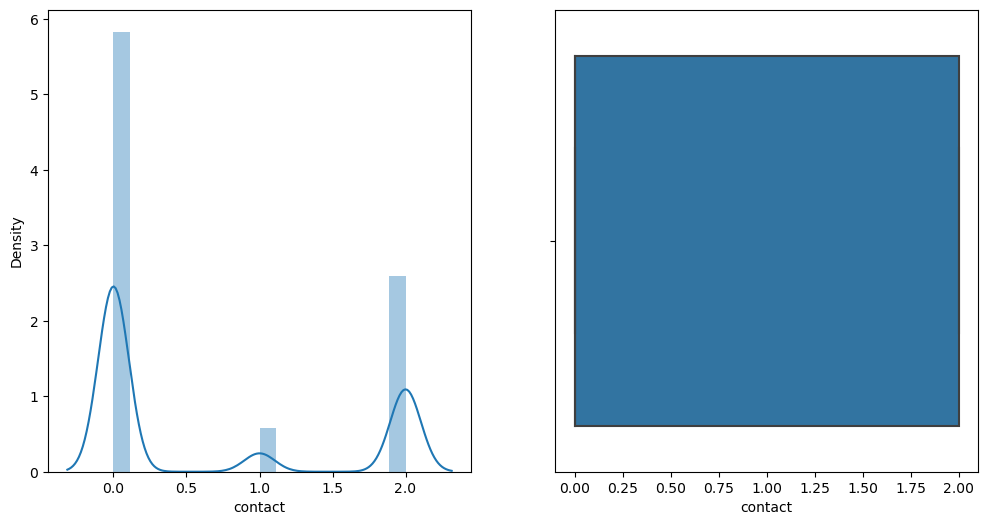

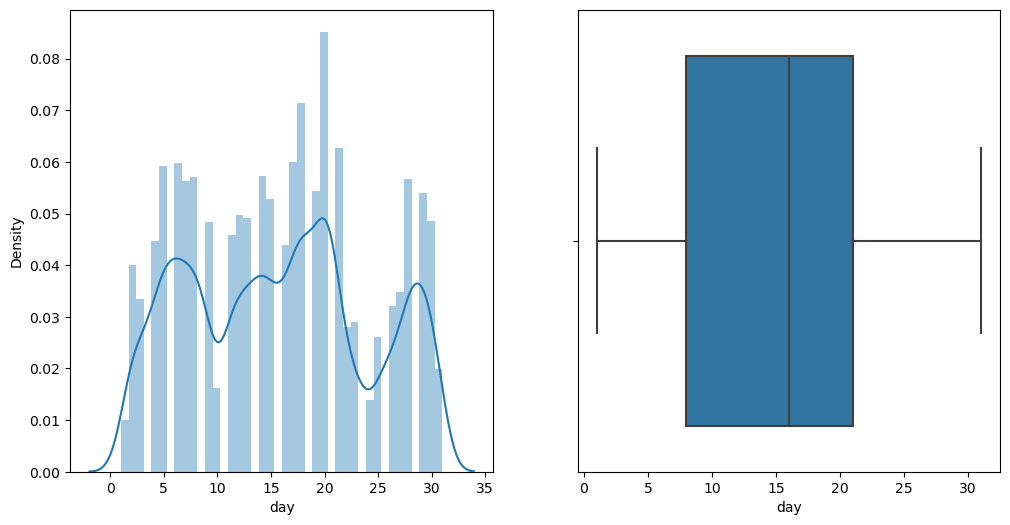

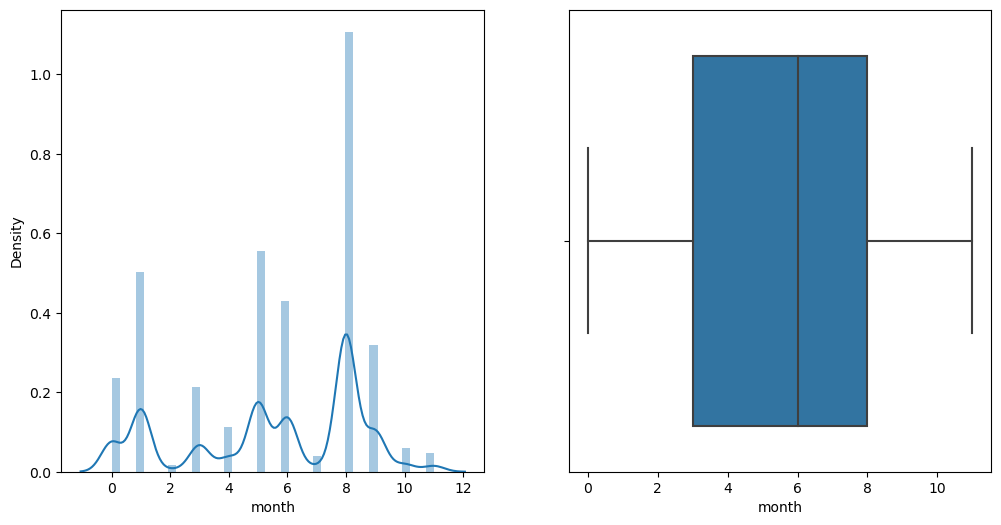

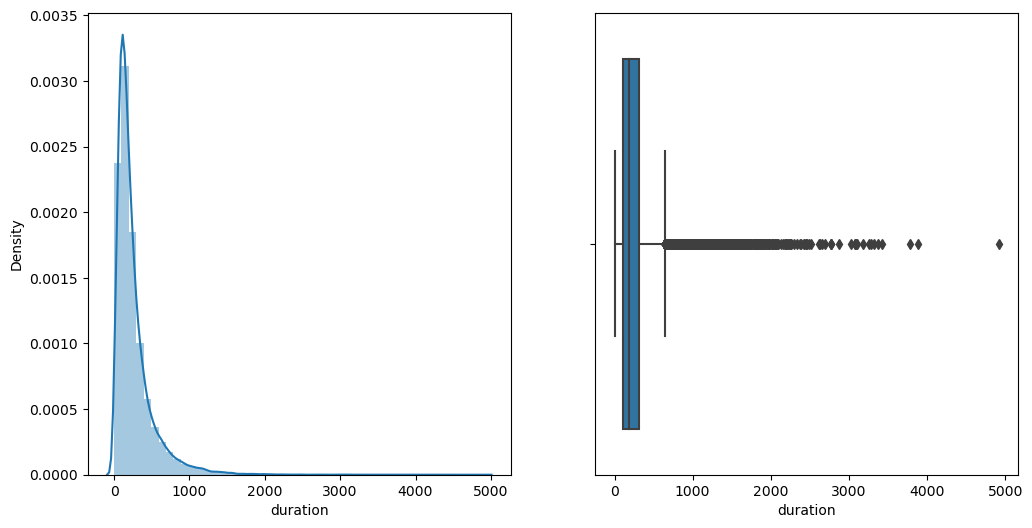

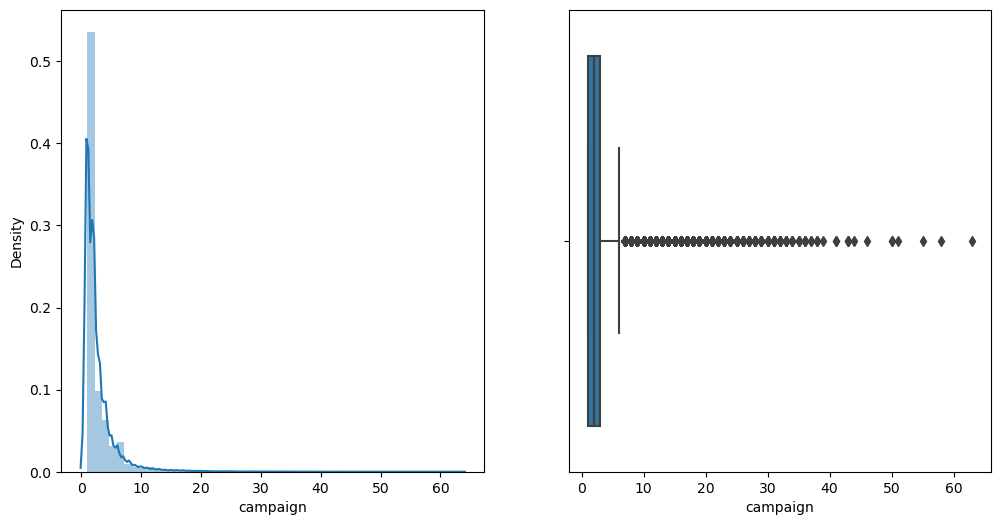

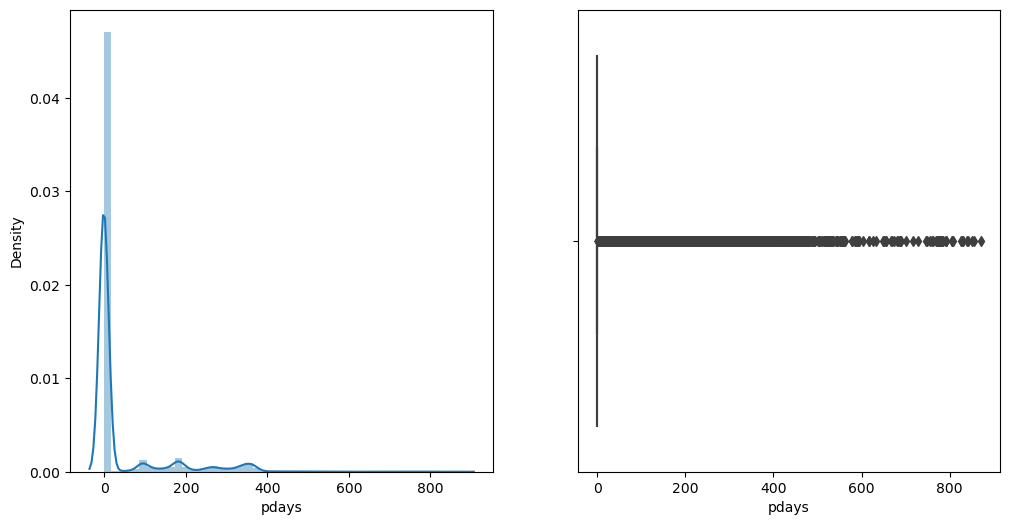

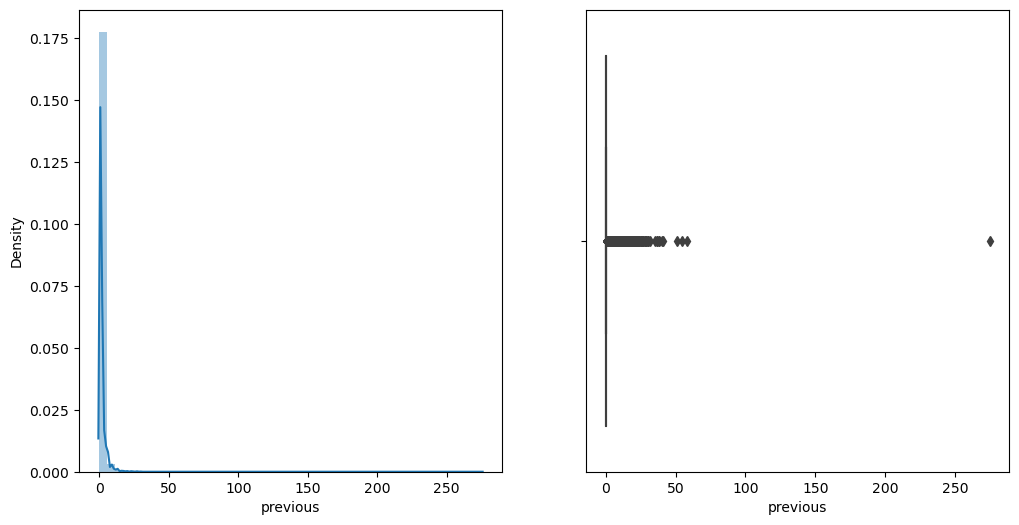

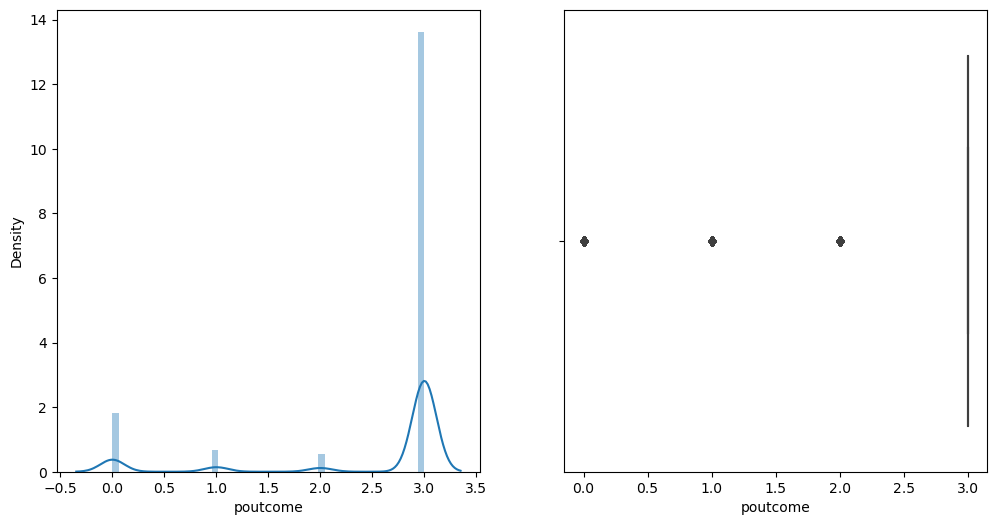

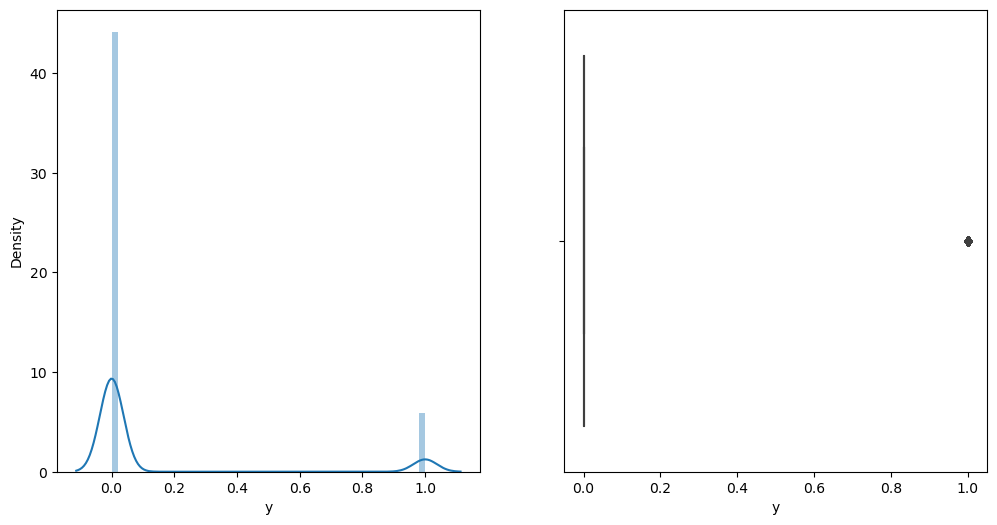

In [43]:
for col in df.columns:
    plt.figure(figsize=(12,6))
    
    plt.subplot(121)
    sns.distplot(df[col],label='skewness:'+ str(np.round(df[col].skew(),2)))
    plt.subplot(122)
    sns.boxplot(df[col])
    plt.tight_layout

<AxesSubplot:>

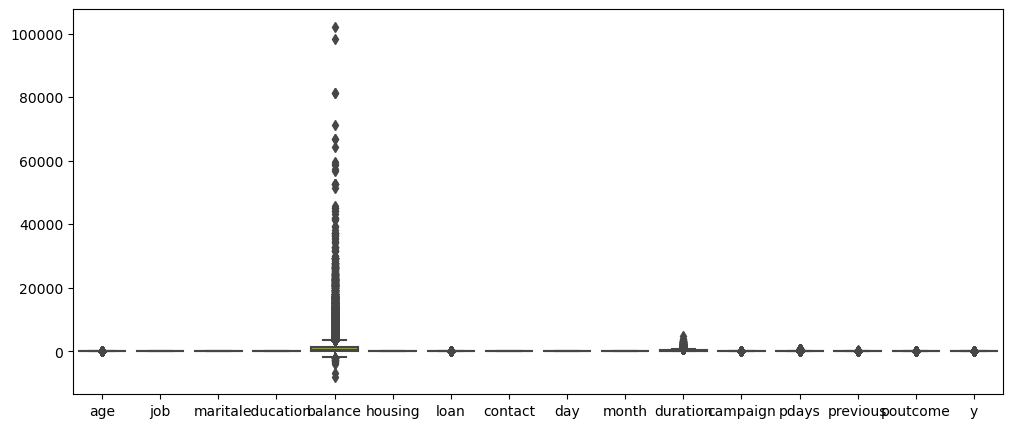

In [44]:
#box plot to visulize the outlier
plt.figure(figsize=(12,5))
sns.boxplot(data=df)

In [45]:
#importing the Standard scaler to scale the data 
from sklearn.preprocessing import MinMaxScaler
x=MinMaxScaler().fit_transform(x)


In [46]:
#spliting the data as train and test
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [47]:
y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

# over Sampling using SMOTE 

In [48]:
#data balancing should be done because data's are not distributed properly
#let me use oversampling techniques
from imblearn.over_sampling import SMOTE


# Apply SMOTE oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Display new class distribution
pd.Series(y_resampled).value_counts()

0    27953
1    27953
Name: y, dtype: int64

In [49]:
#creating the model and training the model by fitting the data
model=LogisticRegression().fit(X_resampled,y_resampled)

#finding the co-efficent beta or slope for all independent variables
model.coef_,model

(array([[ 0.5879873 ,  0.10548637,  0.50558314,  0.71693691,  2.8643245 ,
         -1.22241838, -0.94599822, -1.65916345, -0.39230829,  0.44877214,
         29.23325679, -8.48697613,  3.3166774 ,  8.68337341,  0.48293299]]),
 LogisticRegression())

In [50]:
#predecting the test dataset using model
test_prdct=model.predict(X_test)
test_prdct

array([0, 1, 0, ..., 0, 0, 0])

In [51]:
#comparing actual v/s prediction
#creating data frame to compare
newdf=pd.DataFrame({'actual':y_test,'prediction':test_prdct})
newdf

,actual,prediction
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
2666,0,0
35730,0,0
11495,0,0
20975,0,0


In [52]:
#predicting train data itself to find the accuracy of training
traning_prdct=model.predict(X_train)

#training accuracy of the model
accuracy_score(y_train,traning_prdct)

0.8167914810250577

In [53]:
#testing accuracy of the model
accuracy_score(y_test,test_prdct)

0.8065467413742259

In [54]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix
confusion_matrix(y_test,test_prdct)

array([[9729, 2240],
       [ 384, 1211]], dtype=int64)

In [55]:
#calculating the accuracy by collecting data from Confusion Matrix
((9719+1210)/(9719+2250+385+1210))*100

80.573577115895

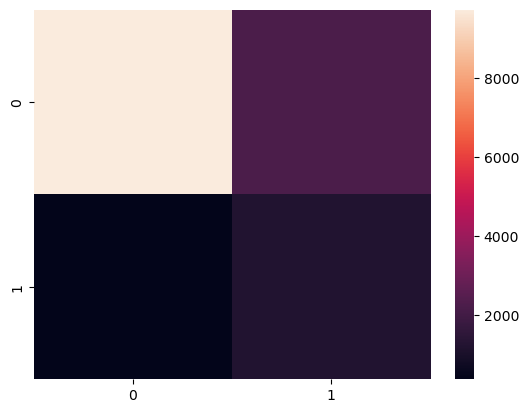

In [56]:
#heatmap shows the classification or prediction 
sns.heatmap(confusion_matrix(y_test,test_prdct));

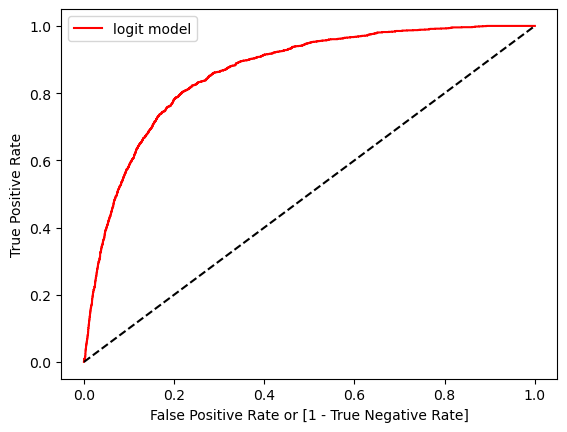

In [57]:
#ploting the roc curve by using probability of model prediction 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#fpr:false positive rate,tpr:true positive rate
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (X_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prdct))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88     11969
           1       0.35      0.76      0.48      1595

    accuracy                           0.81     13564
   macro avg       0.66      0.79      0.68     13564
weighted avg       0.89      0.81      0.83     13564



In [59]:
from imblearn.over_sampling import ADASYN
sm = ADASYN(random_state = 2)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train.ravel())

X_resampled.shape, y_resampled.shape

print(f'size of 0th class  {len(y_resampled[y_resampled==0])}')
print(f'size of 1st class  {len(y_resampled[y_resampled==1])}')

size of 0th class  27953
size of 1st class  27879


In [60]:
#creating the model and training the model by fitting the data
model=LogisticRegression().fit(X_resampled,y_resampled)

#finding the co-efficent beta or slope for all independent variables
model.coef_,model

(array([[ 0.60553898,  0.11234037,  0.45790162,  0.71107169,  3.07944384,
         -1.01912979, -0.76283238, -1.55177241, -0.30962957,  0.35753444,
         29.3914015 , -8.01146365,  2.22117023,  6.27667596,  0.18069764]]),
 LogisticRegression())

In [61]:
#predecting the test dataset using model
test_prdct=model.predict(X_test)
test_prdct

array([0, 1, 0, ..., 0, 0, 0])

In [62]:
#comparing actual v/s prediction
#creating data frame to compare
newdf=pd.DataFrame({'actual':y_test,'prediction':test_prdct})
newdf

,actual,prediction
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
2666,0,0
35730,0,0
11495,0,0
20975,0,0


In [63]:
#predicting train data itself to find the accuracy of training
traning_prdct=model.predict(X_train)

#training accuracy of the model
accuracy_score(y_train,traning_prdct)

0.8162227067336556

In [64]:
#testing accuracy of the model
accuracy_score(y_test,test_prdct)

0.8084635800648776

In [65]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix
confusion_matrix(y_test,test_prdct)

array([[9767, 2202],
       [ 396, 1199]], dtype=int64)

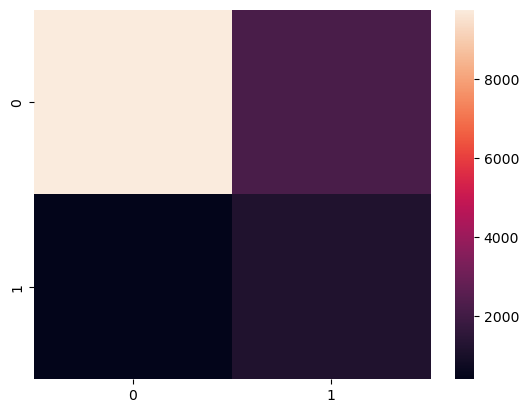

In [66]:
#heatmap shows the classification or prediction 
sns.heatmap(confusion_matrix(y_test,test_prdct));

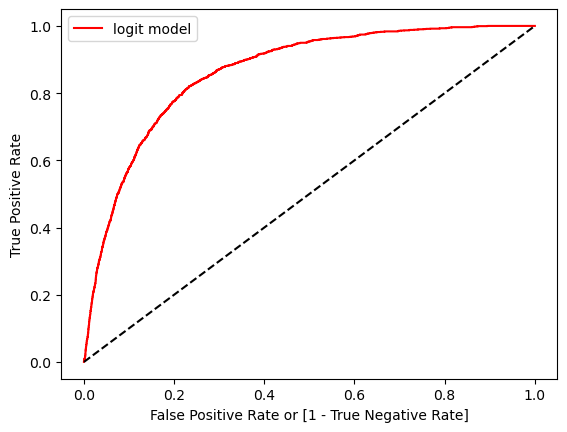

In [67]:
#ploting the roc curve by using probability of model prediction 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#fpr:false positive rate,tpr:true positive rate
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (X_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prdct))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88     11969
           1       0.35      0.75      0.48      1595

    accuracy                           0.81     13564
   macro avg       0.66      0.78      0.68     13564
weighted avg       0.89      0.81      0.84     13564



# SMOTE + ENN

In [71]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state = 2)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

X_resampled.shape,y_resampled.shape

print(f'size of 0th class  {len(y_resampled[y_resampled==0])}')
print(f'size of 1st class  {len(y_resampled[y_resampled==1])}')

size of 0th class  22610
size of 1st class  25960


In [72]:
#creating the model and training the model by fitting the data
model=LogisticRegression().fit(X_resampled,y_resampled)

#finding the co-efficent beta or slope for all independent variables
model.coef_,model

(array([[ 0.96851267,  0.16939418,  0.69557531,  0.97839553,  3.76701208,
         -1.56200989, -1.29490669, -2.12144857, -0.59588425,  0.66877608,
         36.43969749, -8.72422616,  3.90655996,  8.69193918,  0.41147652]]),
 LogisticRegression())

In [73]:
#predecting the test dataset using model
test_prdct=model.predict(X_test)
test_prdct

array([0, 1, 0, ..., 0, 0, 0])

In [74]:
#comparing actual v/s prediction
#creating data frame to compare
newdf=pd.DataFrame({'actual':y_test,'prediction':test_prdct})
newdf

,actual,prediction
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
2666,0,0
35730,0,0
11495,0,0
20975,0,0


In [75]:
#predicting train data itself to find the accuracy of training
traning_prdct=model.predict(X_train)

#training accuracy of the model
accuracy_score(y_train,traning_prdct)

0.7830442064018707

In [76]:
#testing accuracy of the model
accuracy_score(y_test,test_prdct)

0.773370687112946

In [77]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix
confusion_matrix(y_test,test_prdct)

array([[9194, 2775],
       [ 299, 1296]], dtype=int64)

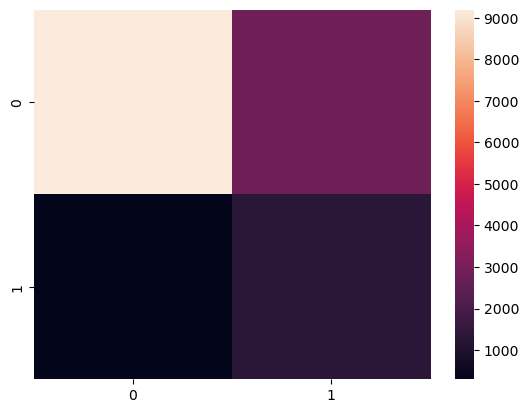

In [78]:
#heatmap shows the classification or prediction 
sns.heatmap(confusion_matrix(y_test,test_prdct));

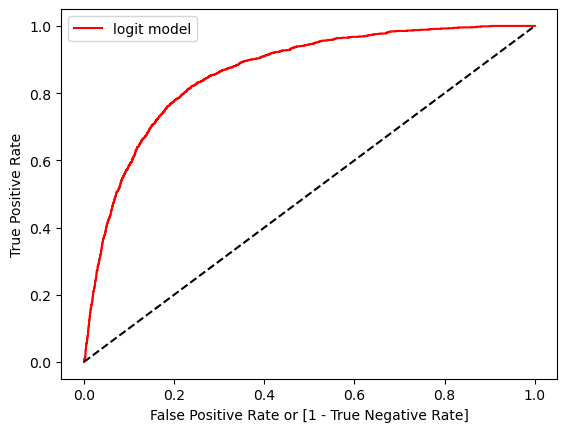

In [79]:
#ploting the roc curve by using probability of model prediction 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#fpr:false positive rate,tpr:true positive rate
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (X_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prdct))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     11969
           1       0.32      0.81      0.46      1595

    accuracy                           0.77     13564
   macro avg       0.64      0.79      0.66     13564
weighted avg       0.89      0.77      0.81     13564



In [82]:
treatoutlier(df,df.columns)

In [83]:
#creating the model and training the model by fitting the data
model=LogisticRegression().fit(X_train,y_train)

#finding the co-efficent beta or slope for all independent variables
model.coef_,model

(array([[ 0.60885547,  0.11529794,  0.43185067,  0.510619  ,  1.81128151,
         -1.01119273, -0.73471495, -1.35452832, -0.21833412,  0.53222812,
         17.72658325, -5.11873787,  3.01512181,  2.73329538,  0.42775514]]),
 LogisticRegression())

In [84]:
#predecting the test dataset using model
test_prdct=model.predict(X_test)
test_prdct

array([0, 1, 0, ..., 0, 0, 0])

In [85]:
#comparing actual v/s prediction
#creating data frame to compare
newdf=pd.DataFrame({'actual':y_test,'prediction':test_prdct})
newdf

,actual,prediction
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
2666,0,0
35730,0,0
11495,0,0
20975,0,0


In [86]:
#predicting train data itself to find the accuracy of training
traning_prdct=model.predict(X_train)

#training accuracy of the model
accuracy_score(y_train,traning_prdct)

0.8916800960596581

In [87]:
#testing accuracy of the model
accuracy_score(y_test,test_prdct)

0.8879386611618991

In [88]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix
confusion_matrix(y_test,test_prdct)

array([[11746,   223],
       [ 1297,   298]], dtype=int64)

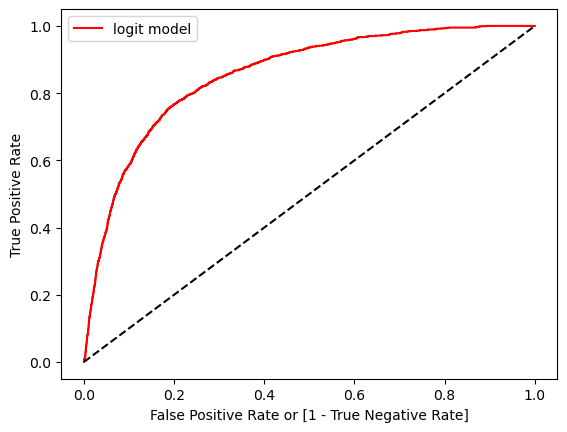

In [89]:
#ploting the roc curve by using probability of model prediction 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#fpr:false positive rate,tpr:true positive rate
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (X_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prdct))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.57      0.19      0.28      1595

    accuracy                           0.89     13564
   macro avg       0.74      0.58      0.61     13564
weighted avg       0.86      0.89      0.86     13564



In [91]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state = 2)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

X_resampled.shape,y_resampled.shape

print(f'size of 0th class  {len(y_resampled[y_resampled==0])}')
print(f'size of 1st class  {len(y_resampled[y_resampled==1])}')

size of 0th class  22610
size of 1st class  25960


In [92]:
#creating the model and training the model by fitting the data
model=LogisticRegression().fit(X_resampled,y_resampled)

#finding the co-efficent beta or slope for all independent variables
model.coef_,model

(array([[ 0.96851267,  0.16939418,  0.69557531,  0.97839553,  3.76701208,
         -1.56200989, -1.29490669, -2.12144857, -0.59588425,  0.66877608,
         36.43969749, -8.72422616,  3.90655996,  8.69193918,  0.41147652]]),
 LogisticRegression())

In [93]:
#predecting the test dataset using model
test_prdct=model.predict(X_test)
test_prdct

array([0, 1, 0, ..., 0, 0, 0])

In [94]:
#comparing actual v/s prediction
#creating data frame to compare
newdf=pd.DataFrame({'actual':y_test,'prediction':test_prdct})
newdf

,actual,prediction
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
2666,0,0
35730,0,0
11495,0,0
20975,0,0


In [95]:
#testing accuracy of the model
accuracy_score(y_test,test_prdct)

0.773370687112946

In [96]:
#predicting train data itself to find the accuracy of training
traning_prdct=model.predict(X_train)

#training accuracy of the model
accuracy_score(y_train,traning_prdct)

0.7830442064018707

In [97]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix
confusion_matrix(y_test,test_prdct)

array([[9194, 2775],
       [ 299, 1296]], dtype=int64)

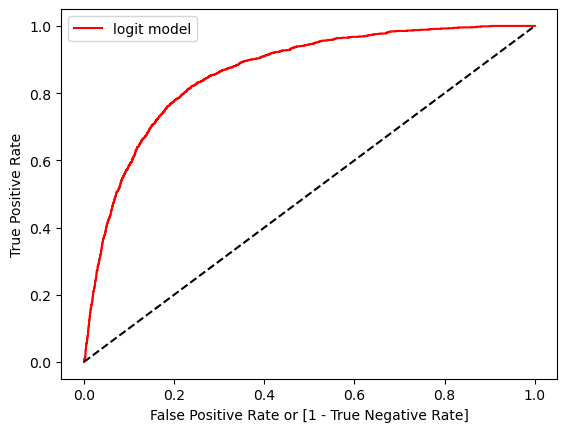

In [98]:
#ploting the roc curve by using probability of model prediction 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#fpr:false positive rate,tpr:true positive rate
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (X_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [99]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prdct))

              precision    recall  f1-score   support

           0       0.97      0.77      0.86     11969
           1       0.32      0.81      0.46      1595

    accuracy                           0.77     13564
   macro avg       0.64      0.79      0.66     13564
weighted avg       0.89      0.77      0.81     13564



# Downsampling techniques

# undersampling

In [100]:
from sklearn.neighbors import NearestNeighbors
from imblearn.under_sampling import TomekLinks
from collections import Counter

# Compute the nearest neighbors of each instance
neighbors = NearestNeighbors(n_neighbors=5)
neighbors.fit(X_train)
distances, indices = neighbors.kneighbors(X_train)

# Perform Tomek Links undersampling
tl = TomekLinks()
X_resampled, y_resampled = tl.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))

Class distribution after undersampling: Counter({0: 27069, 1: 3694})


In [101]:
#creating the model and training the model by fitting the data
model=LogisticRegression().fit(X_resampled, y_resampled)

#finding the co-efficent beta or slope for all independent variables
model.coef_,model

(array([[ 0.64711637,  0.1337022 ,  0.46173012,  0.52158151,  1.8275728 ,
         -1.05872762, -0.78417546, -1.40227406, -0.25490749,  0.56361834,
         18.43916272, -5.2137394 ,  3.03136419,  2.77581178,  0.4195689 ]]),
 LogisticRegression())

In [102]:
#predecting the test dataset using model
test_prdct=model.predict(X_test)
test_prdct

array([0, 1, 0, ..., 0, 0, 0])

In [103]:
#comparing actual v/s prediction
#creating data frame to compare
newdf=pd.DataFrame({'actual':y_test,'prediction':test_prdct})
newdf

,actual,prediction
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
2666,0,0
35730,0,0
11495,0,0
20975,0,0


In [104]:
#testing accuracy of the model
accuracy_score(y_test,test_prdct)

0.887864936596874

In [105]:
#predicting train data itself to find the accuracy of training
traning_prdct=model.predict(X_train)

#training accuracy of the model
accuracy_score(y_train,traning_prdct)

0.8922172717793155

In [106]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix
confusion_matrix(y_test,test_prdct)

array([[11711,   258],
       [ 1263,   332]], dtype=int64)

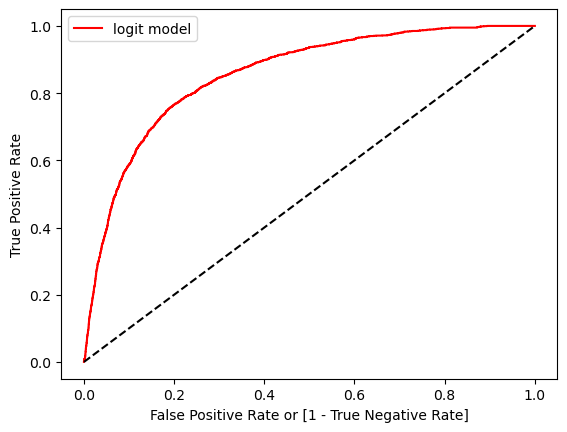

In [107]:
#ploting the roc curve by using probability of model prediction 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#fpr:false positive rate,tpr:true positive rate
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (X_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [108]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prdct))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.56      0.21      0.30      1595

    accuracy                           0.89     13564
   macro avg       0.73      0.59      0.62     13564
weighted avg       0.86      0.89      0.86     13564



In [121]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import NearMiss
from collections import Counter

# Perform NearMiss undersampling
nm = NearMiss(version=1)  # Use version=1 for NearMiss-1, version=2 for NearMiss-2, and version=3 for NearMiss-3
X_resampled, y_resampled = nm.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))


Class distribution after undersampling: Counter({0: 3694, 1: 3694})


In [122]:
#creating the model and training the model by fitting the data
model=LogisticRegression().fit(X_resampled, y_resampled)

#finding the co-efficent beta or slope for all independent variables
model.coef_,model

(array([[ 2.66788163e+00,  7.48782567e-01,  1.01721206e-03,
          2.67319929e-01,  3.49854954e+00, -8.83083666e-01,
          1.58680263e+00, -7.47672982e-02,  3.06813308e-02,
          8.77103105e-01,  1.60026311e+01, -1.60673461e+00,
          3.97815759e+00,  9.19320112e-01, -4.21643323e+00]]),
 LogisticRegression())

In [123]:
#predecting the test dataset using model
test_prdct=model.predict(X_test)
test_prdct

array([0, 1, 1, ..., 0, 1, 1])

In [124]:
#comparing actual v/s prediction
#creating data frame to compare
newdf=pd.DataFrame({'actual':y_test,'prediction':test_prdct})
newdf

,actual,prediction
14001,0,0
32046,1,1
13318,0,1
42991,0,1
14237,0,0
...,...,...
2666,0,1
35730,0,0
11495,0,0
20975,0,1


In [125]:
#testing accuracy of the model
accuracy_score(y_test,test_prdct)

0.6748746682394574

In [126]:
#predicting train data itself to find the accuracy of training
traning_prdct=model.predict(X_train)

#training accuracy of the model
accuracy_score(y_train,traning_prdct)

0.6740291338831484

In [127]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix
confusion_matrix(y_test,test_prdct)

array([[7969, 4000],
       [ 410, 1185]], dtype=int64)

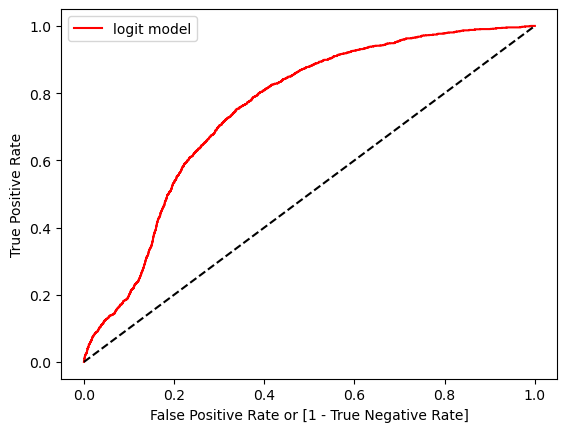

In [128]:
#ploting the roc curve by using probability of model prediction 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#fpr:false positive rate,tpr:true positive rate
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (X_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prdct))

              precision    recall  f1-score   support

           0       0.95      0.67      0.78     11969
           1       0.23      0.74      0.35      1595

    accuracy                           0.67     13564
   macro avg       0.59      0.70      0.57     13564
weighted avg       0.87      0.67      0.73     13564



In [131]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import InstanceHardnessThreshold
from collections import Counter


# Perform Instance Hardness Threshold (IHT) undersampling
iht = InstanceHardnessThreshold(estimator=RandomForestClassifier(random_state=42))
X_resampled, y_resampled = iht.fit_resample(X_train, y_train)

# Check the class distribution after undersampling
print("Class distribution after undersampling:", Counter(y_resampled))

Class distribution after undersampling: Counter({0: 9018, 1: 3694})


In [132]:
#creating the model and training the model by fitting the data
model=LogisticRegression().fit(X_resampled, y_resampled)

#finding the co-efficent beta or slope for all independent variables
model.coef_,model

(array([[ 0.89047206,  0.24584049,  0.89318064,  1.34152736,  5.82033441,
         -1.56650069, -0.91067243, -2.33285727, -0.97695155,  0.66327305,
         33.45683752, -6.8167632 ,  1.78303741,  2.01541574, -0.38522913]]),
 LogisticRegression())

In [133]:
#predecting the test dataset using model
test_prdct=model.predict(X_test)
test_prdct

array([0, 1, 0, ..., 0, 0, 0])

In [134]:
#comparing actual v/s prediction
#creating data frame to compare
newdf=pd.DataFrame({'actual':y_test,'prediction':test_prdct})
newdf

,actual,prediction
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0
...,...,...
2666,0,0
35730,0,0
11495,0,0
20975,0,0


In [135]:
#testing accuracy of the model
accuracy_score(y_test,test_prdct)

0.769979357121793

In [136]:
#predicting train data itself to find the accuracy of training
traning_prdct=model.predict(X_train)

#training accuracy of the model
accuracy_score(y_train,traning_prdct)

0.778020033494486

In [137]:
#to find the classification of data wheather the data are predicted correct or not by using confusion matrix
confusion_matrix(y_test,test_prdct)

array([[9185, 2784],
       [ 336, 1259]], dtype=int64)

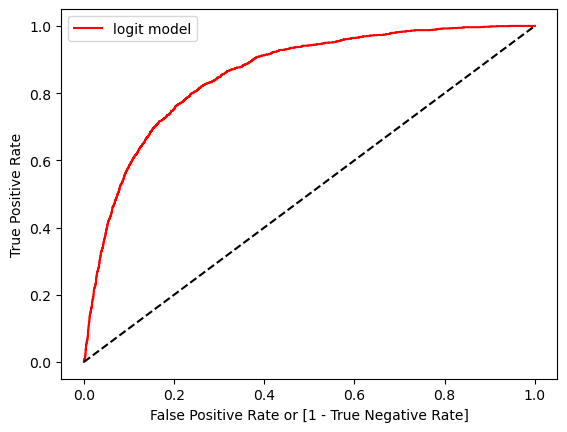

In [138]:
#ploting the roc curve by using probability of model prediction 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#fpr:false positive rate,tpr:true positive rate
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba (X_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_prdct))

              precision    recall  f1-score   support

           0       0.96      0.77      0.85     11969
           1       0.31      0.79      0.45      1595

    accuracy                           0.77     13564
   macro avg       0.64      0.78      0.65     13564
weighted avg       0.89      0.77      0.81     13564

